In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import shutil
import pandas as pd
import numpy as np
import json


In [3]:
data = pd.read_csv('/content/drive/Shareddrives/COVID-19_X-Ray/Project/SIIM_COVID-19_Data_512_PNG/df_ground_truth.csv')
data.head()

,id,folder_id,study_id,width,height,xmin,ymin,xmax,ymax,class
0,000a312787f2_image,81456c9c5423,5776db0cec75,3488,4256,95,85,218,367,opacity
1,000a312787f2_image,81456c9c5423,5776db0cec75,3488,4256,270,87,402,345,opacity
2,0012ff7358bc_image,22897cd1daa0,9d514ce429a7,2544,3056,113,40,259,241,opacity
3,0012ff7358bc_image,22897cd1daa0,9d514ce429a7,2544,3056,300,81,404,323,opacity
4,001398f4ff4f_image,4d47bc042ee6,28dddc8559b2,3520,4280,326,317,440,405,opacity


skip

In [ ]:
column_names = column_names = ["id", "folder_id","study_id", 'width', 'height', 'xmin', 'ymin', 'xmax', 'ymax', 'class']


df = pd.DataFrame(columns = column_names)

In [ ]:
df.head()

,id,folder_id,study_id,width,height,xmin,ymin,xmax,ymax,class


In [ ]:
x = '000a312787f2_image'
new = data.loc[data.id == x]
# new.head()
new.width.iloc[0]
# for index,row in new.iterrows():
#   print(type(row.xmax))


3488

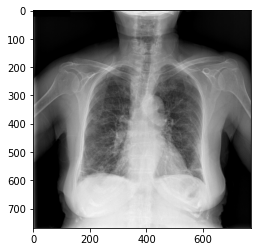

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt


x = Image.open('/content/drive/Shareddrives/COVID-19_X-Ray/Detection_Training/Positives_only/Fold1/valid/004cbd797cd1_image.png')
x = x.resize((768,768))
plt.imshow(x, cmap='gray')

In [ ]:
df = pd.concat([df, new], ignore_index=True)
df.head()

,id,folder_id,study_id,width,height,xmin,ymin,xmax,ymax,class
0,0012ff7358bc_image,22897cd1daa0,9d514ce429a7,2544,3056,113,40,259,241,opacity
1,0012ff7358bc_image,22897cd1daa0,9d514ce429a7,2544,3056,300,81,404,323,opacity


end of skip

MAKE COCO ANNOTS

In [4]:
pth = '/content/drive/Shareddrives/COVID-19_X-Ray/Detection_Training/Fold4/valid' #'/content/drive/Shareddrives/COVID-19_X-Ray/Detection_Training/Positives_only/Fold5/train'
save_json_path =os.path.join('/content/drive/Shareddrives/COVID-19_X-Ray/Detection_Training/Fold4', 'fold4_valid.json')

In [5]:
#def convert_to_coco(pth, data, save_json_path):
images = []
categories = [{"supercategory": 'null', "id": 0, "name": "opacity"}]
annotations = []
im_ind =0
ann_ind = 0
for img in os.listdir(pth):
    id = img.split('.')[0] 
    image = {}
    subset = data.loc[data['id'] ==id ]
    #print(subset)
    image["license"] = 0
    image["url"]= 'null'      
    image['date_captured'] = 'null'
    image["height"] = 512 #int(subset.width.iloc[0])
    image["width"] = 512 #int(subset.height.iloc[0])
    image["id"] = im_ind
    image["file_name"] = img
    images.append(image)
    
    if subset["class"].iloc[0] == "opacity":
      for index,row in subset.iterrows():
        annotation = {}
        area = (row.xmax -row.xmin)*(row.ymax - row.ymin)
        #annotation["segmentation"] = []
        annotation["iscrowd"] = 0
        annotation["area"] = int(area)
        annotation["image_id"] = im_ind

        annotation["bbox"] = [int(row.xmin), int(row.ymin), int(row.xmax -row.xmin),int(row.ymax-row.ymin) ]

        annotation["category_id"] = 0
        annotation["id"] = ann_ind
        annotations.append(annotation)
        ann_ind += 1
    im_ind  += 1
data_coco = {}
data_coco["images"] = images
data_coco["categories"] = categories
data_coco["annotations"] = annotations
data_coco["info"] = { "description": "SIIM Covid-19 GroupKfold",
        "url": 'null',
        "version": 'null',
        "year": 2021,
        "contributor": 'null',
        "date_created": "2021-08-05"}
data_coco["licenses"] =  [
        {
            "url": 'null',
            "id": 0,
            "name": 'null'
        }
    ]
json.dump(data_coco, open(save_json_path, "w"), indent=4)

In [6]:
len(data_coco["images"] )

1267

Skip

In [ ]:
new_valid = '/content/drive/Shareddrives/COVID-19_X-Ray/Detection_Training/Fold1/valid'
new_train = '/content/drive/Shareddrives/COVID-19_X-Ray/Detection_Training/Fold1/train'


In [ ]:
x = os.listdir(new_valid)

In [ ]:
print(x)

['25eb1bccd8ce_image.png', '9580e2f9a387_image.png', '68ce4e0fabae_image.png', 'b470b81c35c2_image.png', 'bda91f29da7d_image.png', '0c7b15362352_image.png', '1ed1fa2827c8_image.png', '8fa48096e899_image.png', '5faceacc7da1_image.png', '1e9fe71f89bf_image.png', '3b982073ec16_image.png', 'ed8e9c18f3aa_image.png', '5ef8fda13991_image.png', 'aabf3a11ea75_image.png', 'ea9a6ebec879_image.png', '9b2d4652ad72_image.png', '5ecada95f5ef_image.png', 'ad9728a13dbb_image.png', '8a108ed6eb35_image.png', '64378532251b_image.png', '1dc00be9fa90_image.png', '708d6ec7641b_image.png', 'e78b16cfb742_image.png', 'a998c74ce8a9_image.png', '65cc2ce89d98_image.png', '75b19c70bbb4_image.png', 'd287c6d8d984_image.png', '34a0ef23101b_image.png', 'de3f49a6fa45_image.png', '5726e96c702b_image.png', 'c5a479dcbc36_image.png', '018f32c6644f_image.png', 'bf3cd81b532c_image.png', '0abc1b4a90f5_image.png', 'b7a016c2e971_image.png', 'f2de614a9ebf_image.png', '5825b42a91e1_image.png', 'fb90b9f3be91_image.png', '5489fb1610

In [ ]:
print(len(os.listdir(fold_train)))

1267


In [ ]:
fold_train = '/content/drive/Shareddrives/COVID-19_X-Ray/Detection_Training/Fold5/train'
for name in x:
  shutil.copy(src=os.path.join(new_valid, name),  dst=os.path.join(fold_train, name))

In [ ]:
len(x)

1267

In [ ]:
y = os.listdir(new_train)

In [ ]:
len(y)

5067

In [ ]:
print(x)

['25eb1bccd8ce_image.png', '9580e2f9a387_image.png', '68ce4e0fabae_image.png', 'b470b81c35c2_image.png', 'bda91f29da7d_image.png', '0c7b15362352_image.png', '1ed1fa2827c8_image.png', '8fa48096e899_image.png', '5faceacc7da1_image.png', '1e9fe71f89bf_image.png', '3b982073ec16_image.png', 'ed8e9c18f3aa_image.png', '5ef8fda13991_image.png', 'aabf3a11ea75_image.png', 'ea9a6ebec879_image.png', '9b2d4652ad72_image.png', '5ecada95f5ef_image.png', 'ad9728a13dbb_image.png', '8a108ed6eb35_image.png', '64378532251b_image.png', '1dc00be9fa90_image.png', '708d6ec7641b_image.png', 'e78b16cfb742_image.png', 'a998c74ce8a9_image.png', '65cc2ce89d98_image.png', '75b19c70bbb4_image.png', 'd287c6d8d984_image.png', '34a0ef23101b_image.png', 'de3f49a6fa45_image.png', '5726e96c702b_image.png', 'c5a479dcbc36_image.png', '018f32c6644f_image.png', 'bf3cd81b532c_image.png', '0abc1b4a90f5_image.png', 'b7a016c2e971_image.png', 'f2de614a9ebf_image.png', '5825b42a91e1_image.png', 'fb90b9f3be91_image.png', '5489fb1610

In [ ]:
print(y)

['7652321644be_image.png', '300b663f5b0e_image.png', 'ea3d66fd0904_image.png', '2a7f96c98513_image.png', '1f09d8254115_image.png', '7f351f57e889_image.png', 'cd6e56f2f2ac_image.png', 'e34939f0a328_image.png', '725328925e0f_image.png', '81d61a02b089_image.png', '96304720ba90_image.png', '500a498ca956_image.png', '050021ae3649_image.png', 'd45db88b0625_image.png', '8947447b6929_image.png', '345ff154ba07_image.png', 'a91c8ab91955_image.png', '9bd968a5e051_image.png', '2713386407ac_image.png', '5e14522be0ff_image.png', '891e69e94d41_image.png', '311b7f98fd08_image.png', 'f3d8c72372fe_image.png', 'f39eadda837b_image.png', '7e8966bfec61_image.png', '5301dfecfce2_image.png', '67abaa5570f0_image.png', 'a96dd75ea710_image.png', '5313f8579e68_image.png', '36d85956f758_image.png', '200d32c95698_image.png', '4390dc824c58_image.png', 'fa9e53baa145_image.png', 'd4131bd4e64a_image.png', '920b0417df19_image.png', '2eb83e7d6a43_image.png', 'c7b23395d254_image.png', '266cd3b181c5_image.png', 'bdac90f5c4

In [ ]:
 fold2 = []
 

In [ ]:
def get_fold(list_rem, df, opacity_thresh=859):
  b = []
  i = 0
  opacity_count = 0
  none_count = 0
  while i < len(list_rem):
    id = list_rem[i].split(".")[0]
   
    if df.loc[df["id"] == id, "class"].iloc[0] == "opacity":
      if opacity_count == opacity_thresh:
        i += 1
      else: 
        b.append(list_rem[i])
        list_rem.remove(list_rem[i])
        opacity_count += 1
    

    else:
      if none_count == 408:
        i += 1
      else:
        b.append(list_rem[i])
        list_rem.remove(list_rem[i])
        none_count += 1
  print("number of opacities in fold: ", opacity_count )
  print("number of negatives in fld: ", none_count)
  return b, list_rem
      

In [ ]:
fold2, rem_list = get_fold(y, df)

number of opacities in fold:  859
number of negatives in fld:  408


In [ ]:
fold3, rem_list = get_fold(rem_list, df)

number of opacities in fold:  859
number of negatives in fld:  408


In [ ]:
fold4, rem_list = get_fold(rem_list, df)

number of opacities in fold:  859
number of negatives in fld:  408


In [ ]:
fold5, rem_list = get_fold(rem_list, df, opacity_thresh=858)

number of opacities in fold:  858
number of negatives in fld:  408


In [ ]:
old_train = os.listdir('/content/drive/Shareddrives/COVID-19_X-Ray/Detection_Training/Fold1/train')
len(old_train)

5067

In [ ]:
to_train = []
to_train.extend(fold2)
to_train.extend(fold3)
to_train.extend(fold4)
print(len(to_train))

3801


In [ ]:
print(fold2[10] in to_train)

True


In [ ]:
fold = '/content/drive/Shareddrives/COVID-19_X-Ray/Detection_Training/Fold5/train'
for name in to_train:
  shutil.copy(src=os.path.join(new_train, name),  dst=os.path.join(fold, name))

In [ ]:
print(len(os.listdir(fold)))

5068


In [ ]:


path = 'annotations.csv' # the path to the CSV file
save_json_path = 'traincoco.json'


data = pd.read_csv(path)

images = []
categories = []
annotations = []

category = {}
category["supercategory"] = 'none'
category["id"] = 0
category["name"] = 'None'
categories.append(category)

data['fileid'] = data['filename'].astype('category').cat.codes
data['categoryid']= pd.Categorical(data['class'],ordered= True).codes
data['categoryid'] = data['categoryid']+1
data['annid'] = data.index

def image(row):
    image = {}
    image["height"] = row.height
    image["width"] = row.width
    image["id"] = row.fileid
    image["file_name"] = row.filename
    return image

def category(row):
    category = {}
    category["supercategory"] = 'None'
    category["id"] = row.categoryid
    category["name"] = row[2]
    return category

def annotation(row):
    annotation = {}
    area = (row.xmax -row.xmin)*(row.ymax - row.ymin)
    annotation["segmentation"] = []
    annotation["iscrowd"] = 0
    annotation["area"] = area
    annotation["image_id"] = row.fileid

    annotation["bbox"] = [row.xmin, row.ymin, row.xmax -row.xmin,row.ymax-row.ymin ]

    annotation["category_id"] = row.categoryid
    annotation["id"] = row.annid
    return annotation

for row in data.itertuples():
    annotations.append(annotation(row))

imagedf = data.drop_duplicates(subset=['fileid']).sort_values(by='fileid')
for row in imagedf.itertuples():
    images.append(image(row))

catdf = data.drop_duplicates(subset=['categoryid']).sort_values(by='categoryid')
for row in catdf.itertuples():
    categories.append(category(row))

data_coco = {}
data_coco["images"] = images
data_coco["categories"] = categories
data_coco["annotations"] = annotations
json.dump(data_coco, open(save_json_path, "w"), indent=4)

In [ ]:
a = [1,3,2, -1, 5, 6, 9, 0, 19]
b = []

# for elem in a:
#   print(elem)
#   if elem < 3:

#   #  print(-1 < 3)
#     b.append(elem)
#     # a = a.remove(elem)

print(a)
print(b)

[3, 5, 6, 9, 19]
[1, 2, -1, 0]


In [ ]:
path = 'annotations.csv' # the path to the CSV file
save_json_path = 'traincoco.json'


data = pd.read_csv(path)

images = []
categories = []
annotations = []

category = {}
category["supercategory"] = 'none'
category["id"] = 0
category["name"] = 'None'
categories.append(category)

data['fileid'] = data['filename'].astype('category').cat.codes
data['categoryid']= pd.Categorical(data['class'],ordered= True).codes
data['categoryid'] = data['categoryid']+1
data['annid'] = data.index

def image(row):
    image = {}
    image["height"] = row.height
    image["width"] = row.width
    image["id"] = row.fileid
    image["file_name"] = row.filename
    return image

def category(row):
    category = {}
    category["supercategory"] = 'None'
    category["id"] = row.categoryid
    category["name"] = row[2]
    return category

def annotation(row):
    annotation = {}
    area = (row.xmax -row.xmin)*(row.ymax - row.ymin)
    annotation["segmentation"] = []
    annotation["iscrowd"] = 0
    annotation["area"] = area
    annotation["image_id"] = row.fileid

    annotation["bbox"] = [row.xmin, row.ymin, row.xmax -row.xmin,row.ymax-row.ymin ]

    annotation["category_id"] = row.categoryid
    annotation["id"] = row.annid
    return annotation

for row in data.itertuples():
    annotations.append(annotation(row))

imagedf = data.drop_duplicates(subset=['fileid']).sort_values(by='fileid')
for row in imagedf.itertuples():
    images.append(image(row))

catdf = data.drop_duplicates(subset=['categoryid']).sort_values(by='categoryid')
for row in catdf.itertuples():
    categories.append(category(row))

data_coco = {}
data_coco["images"] = images
data_coco["categories"] = categories
data_coco["annotations"] = annotations
json.dump(data_coco, open(save_json_path, "w"), indent=4)  